# Roll Over detection output
- Here is the Analysis of the threshold to find the closest value of the roll over considering the imu on the chasis of the robot.
---

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
datos_roll_over_1 = pd.read_csv('out_roll1.csv')
datos_roll_over_2 = pd.read_csv('out_roll2.csv')
datos_roll_over_3 = pd.read_csv('out_roll3.csv')

datos_normal_1 = pd.read_csv('out_roll_normal.csv')
datos_normal_2 = pd.read_csv('out_roll_normal2.csv')
datos_normal_3 = pd.read_csv('out_roll_normal3.csv')
datos_normal_4 = pd.read_csv('out_roll_normal4.csv')

data = [datos_roll_over_1, datos_roll_over_2, datos_roll_over_3,
        datos_normal_1, datos_normal_2, datos_normal_3,
        datos_normal_4]

- Format

In [5]:
datos_roll_over_1.head()

,timestamp_sec,timestamp_nsec,orientation_x,orientation_y,orientation_z,orientation_w,angular_velocity_x,angular_velocity_y,angular_velocity_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z
0,1731016368,17537500,0.028034,0.058394,0.283500,0.956782,-0.235556,-0.152222,-0.771111,-0.83,0.45,10.78
1,1731016368,51942088,0.028638,0.058101,0.273570,0.959669,-0.188889,-0.013333,-0.664444,-0.41,-2.24,11.18
2,1731016368,83601056,0.029238,0.057801,0.263610,0.962452,-0.145556,0.116667,-0.784444,-0.12,-0.59,8.06
3,1731016368,118572355,0.030274,0.057265,0.246246,0.967041,0.040000,0.065556,-1.010000,-0.51,-0.34,10.05
4,1731016368,150988698,0.031083,0.056830,0.232508,0.970435,0.017778,-0.004444,-1.002222,-1.80,2.14,12.07


In [11]:
for dat in data:
    dat['time(s)'] = dat['timestamp_sec'] + dat['timestamp_nsec'] / 1e9

In [12]:
for dat in data:
    dat['time(s)'] = dat['time(s)'].astype(float)
    
    dat['normalized_time'] = dat['time(s)'] - dat['time(s)'].iloc[0]
    quaternions = dat[['orientation_x', 'orientation_y', 'orientation_z', 'orientation_w']].to_numpy()

    rotations = R.from_quat(quaternions)
    euler_angles = rotations.as_euler('xyz', degrees=False)

    dat['rotation_roll'], dat['rotation_pitch'], dat['rotation_yaw'] = euler_angles.T

In [13]:
datos_roll_over_1.head()

,timestamp_sec,timestamp_nsec,orientation_x,orientation_y,orientation_z,orientation_w,angular_velocity_x,angular_velocity_y,angular_velocity_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,rotation_roll,rotation_pitch,rotation_yaw,time(s),normalized_time
0,1731016368,17537500,0.028034,0.058394,0.283500,0.956782,-0.235556,-0.152222,-0.771111,-0.83,0.45,10.78,0.087266,0.095993,0.580322,1.731016e+09,0.000000
1,1731016368,51942088,0.028638,0.058101,0.273570,0.959669,-0.188889,-0.013333,-0.664444,-0.41,-2.24,11.18,0.087266,0.095993,0.559596,1.731016e+09,0.034405
2,1731016368,83601056,0.029238,0.057801,0.263610,0.962452,-0.145556,0.116667,-0.784444,-0.12,-0.59,8.06,0.087266,0.095993,0.538870,1.731016e+09,0.066063
3,1731016368,118572355,0.030274,0.057265,0.246246,0.967041,0.040000,0.065556,-1.010000,-0.51,-0.34,10.05,0.087266,0.095993,0.502873,1.731016e+09,0.101035
4,1731016368,150988698,0.031083,0.056830,0.232508,0.970435,0.017778,-0.004444,-1.002222,-1.80,2.14,12.07,0.087266,0.095993,0.474511,1.731016e+09,0.133451


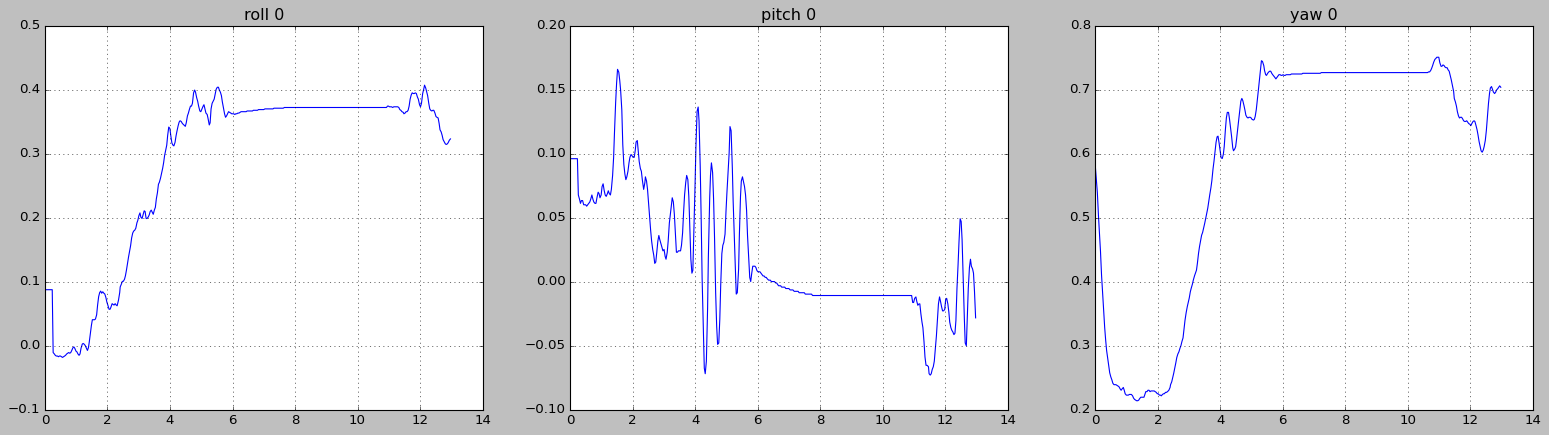

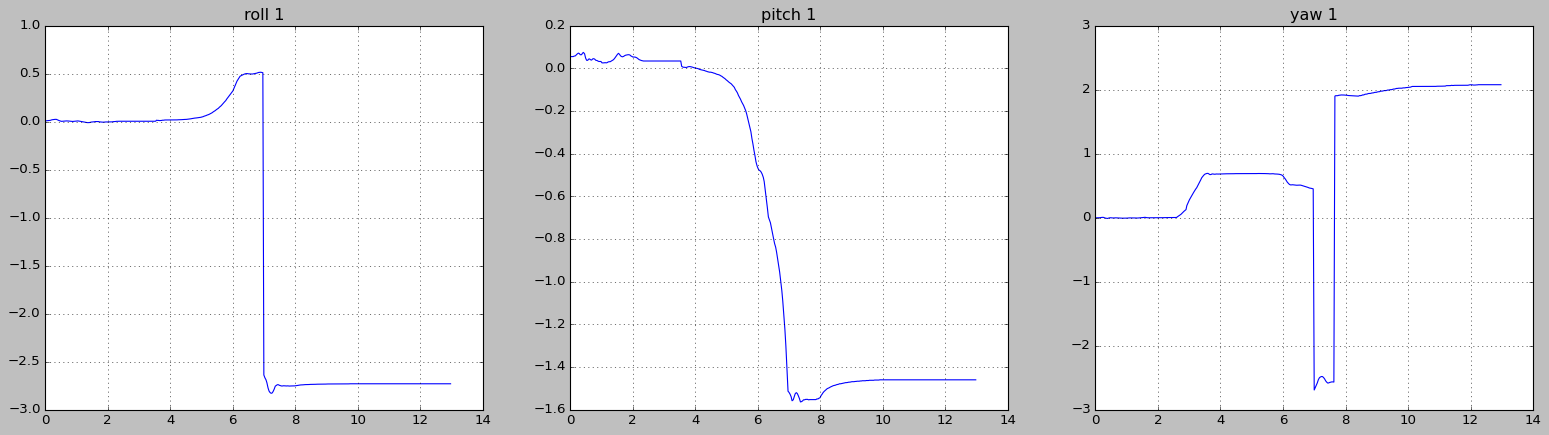

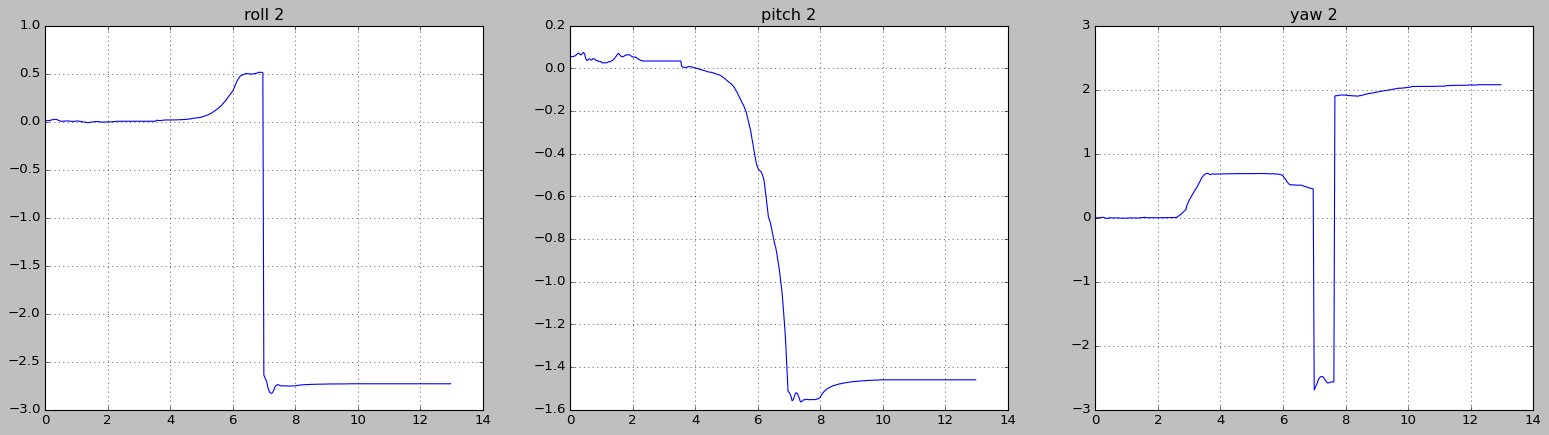

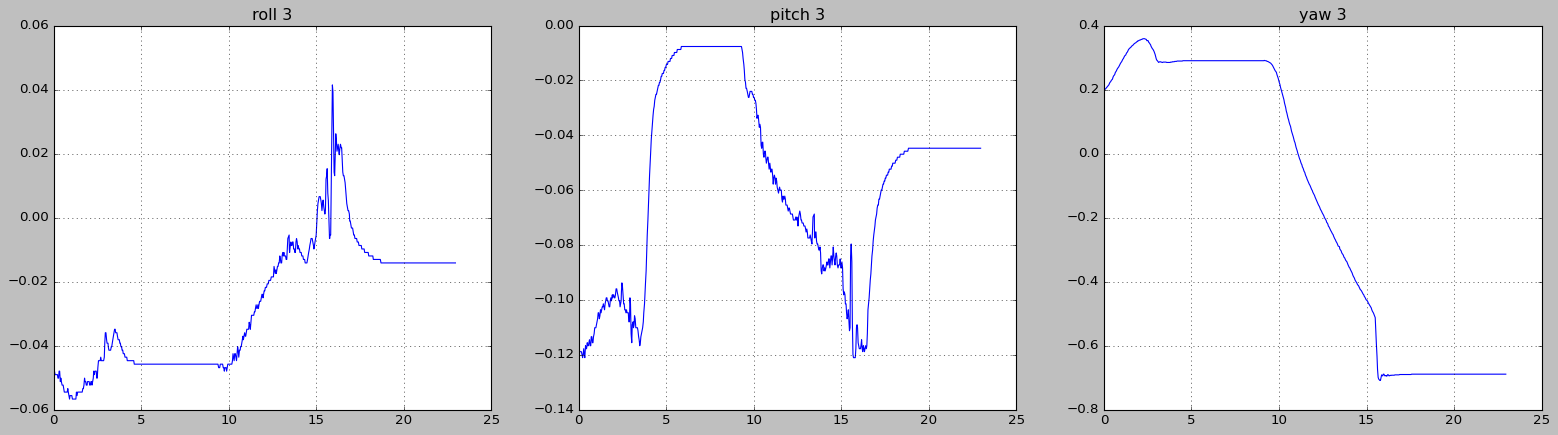

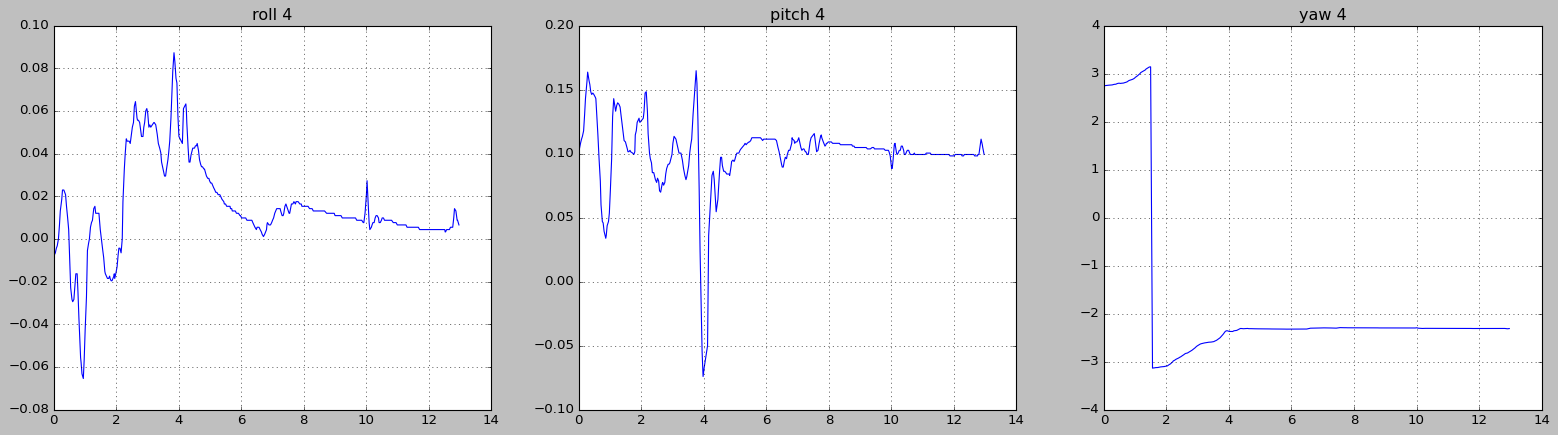

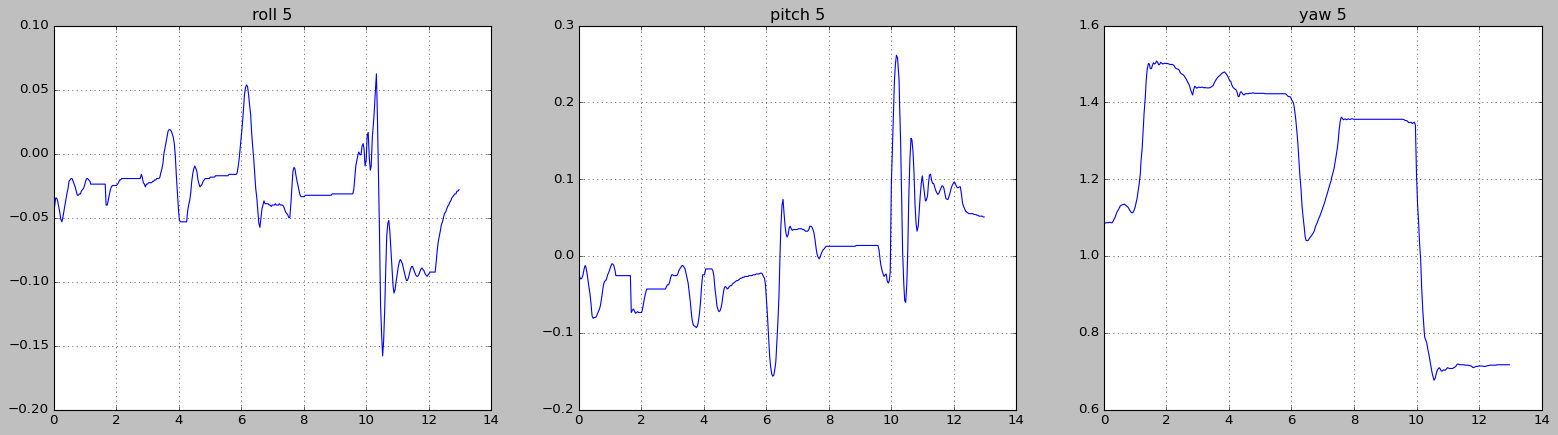

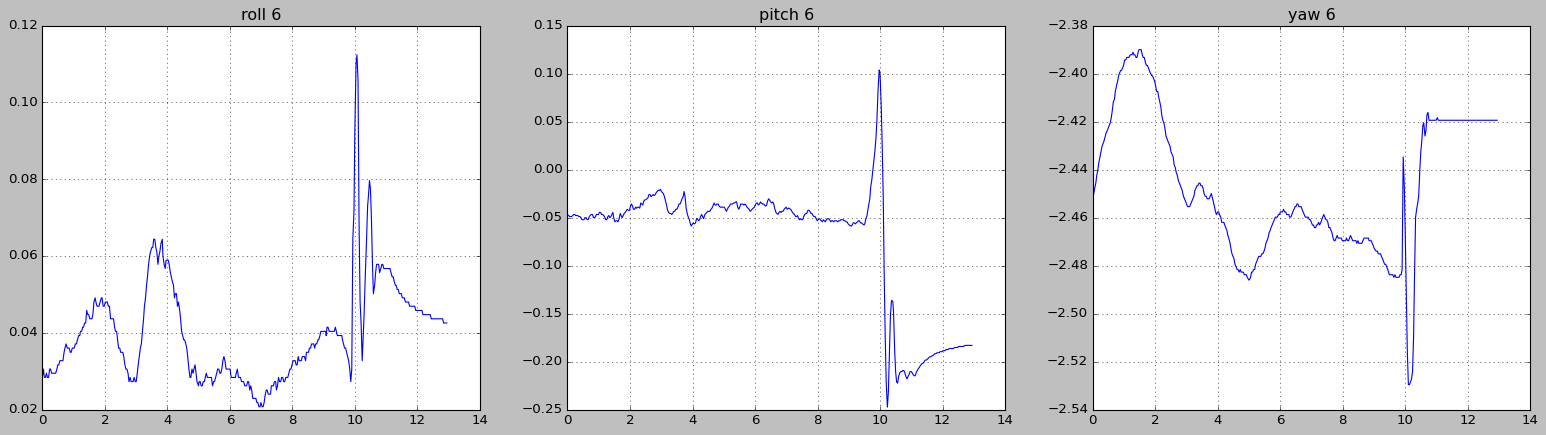

In [28]:
file = 0
for dat in data:
    plt.figure(figsize=(24, 6))
    plt.style.use('classic')
    plt.subplot(1, 3, 1)
    plt.title(f'roll {file}')
    plt.plot(dat['normalized_time'], dat['rotation_roll'])
    plt.grid()
    plt.subplot(1, 3, 2)
    plt.title(f'pitch {file}')
    plt.plot(dat['normalized_time'], dat['rotation_pitch'])
    plt.grid()
    plt.subplot(1, 3, 3)
    plt.title(f'yaw {file}')
    plt.plot(dat['normalized_time'], dat['rotation_yaw'])
    plt.grid()
    file += 1

- I assume that the yaw on the z-axe are the direction of the rotation on the navegation of the robot, so it not represent a variable to get the roll over, is important to notice that the roll and pitch are more important in order to get valius data. 

In [30]:
def evaluate_rollover(_data):
    """
    Evaluate each row in the DataFrame to classify its state as:
    - 'roll over': if roll > 1 or roll < -1, OR pitch > 1 or pitch < -1
    - 'pronounced': if -0.4 > roll > 0.4 OR -0.4 > pitch > 0.4
    - 'normal': if none of the above conditions are met.

    Parameters:
        _data (pd.DataFrame): A DataFrame containing 'rotation_roll' and 'rotation_pitch' columns.

    Returns:
        pd.DataFrame: The original DataFrame with a new column 'state' containing the classifications.
    """
    def classify(row):
        roll, pitch = row['rotation_roll'], row['rotation_pitch']
        
        if abs(roll) > 1 or abs(pitch) > 1:
            return "Roll_over"
        
        if abs(roll) > 0.4 or abs(pitch) > 0.4:
            return "Pronounced"
        
        return "Normal"
    
    _data['state'] = data.apply(classify, axis=1)
    return _data

In [36]:
for dat in data:
    dat = evaluate_rollover(dat)

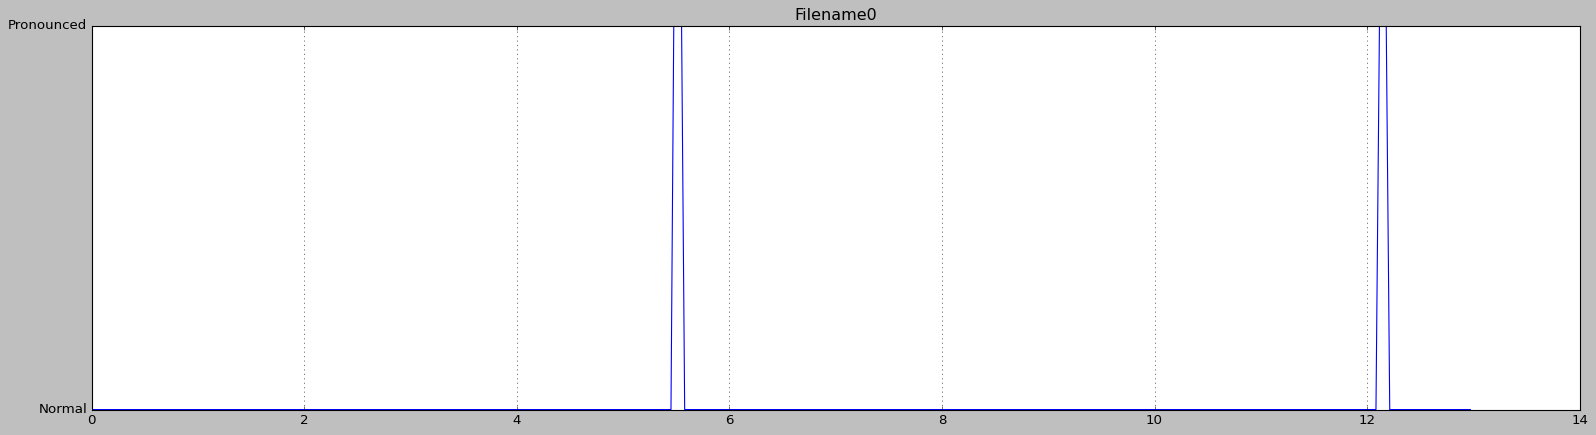

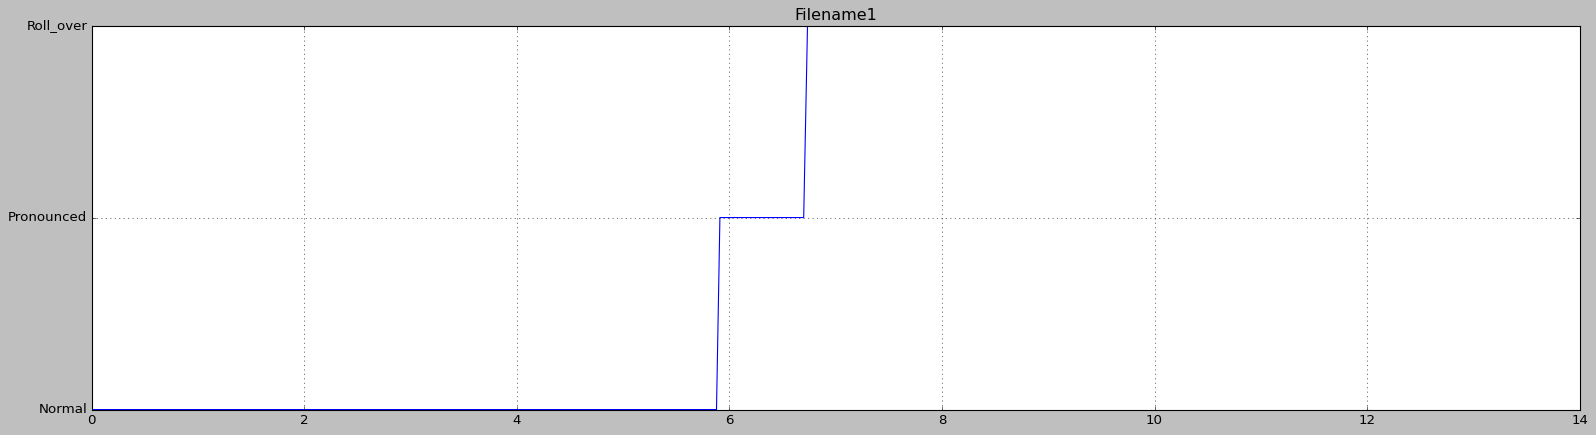

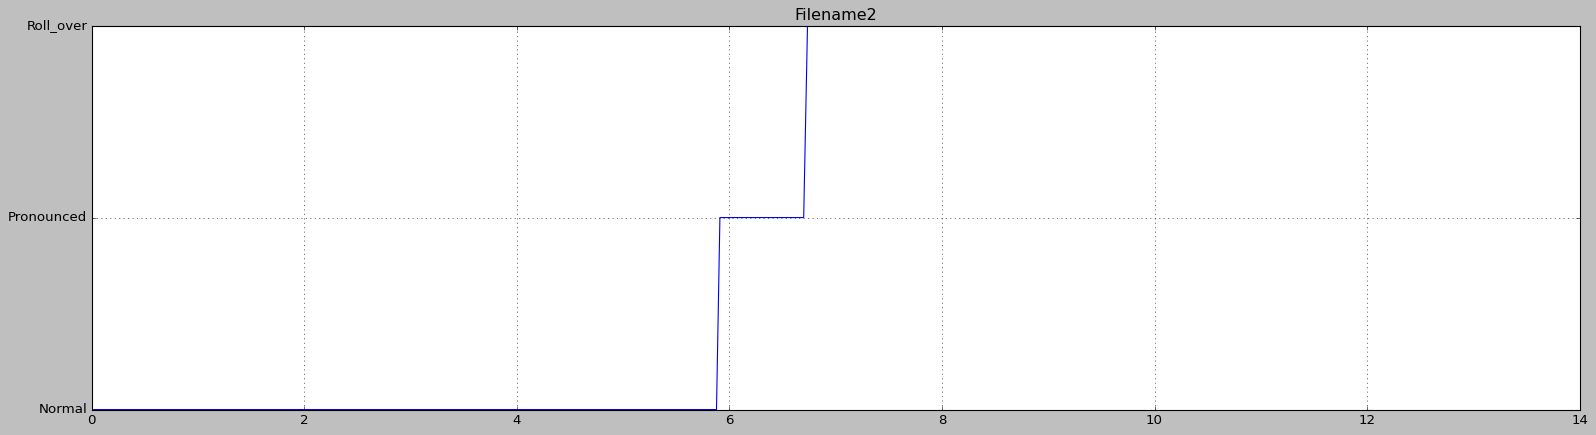

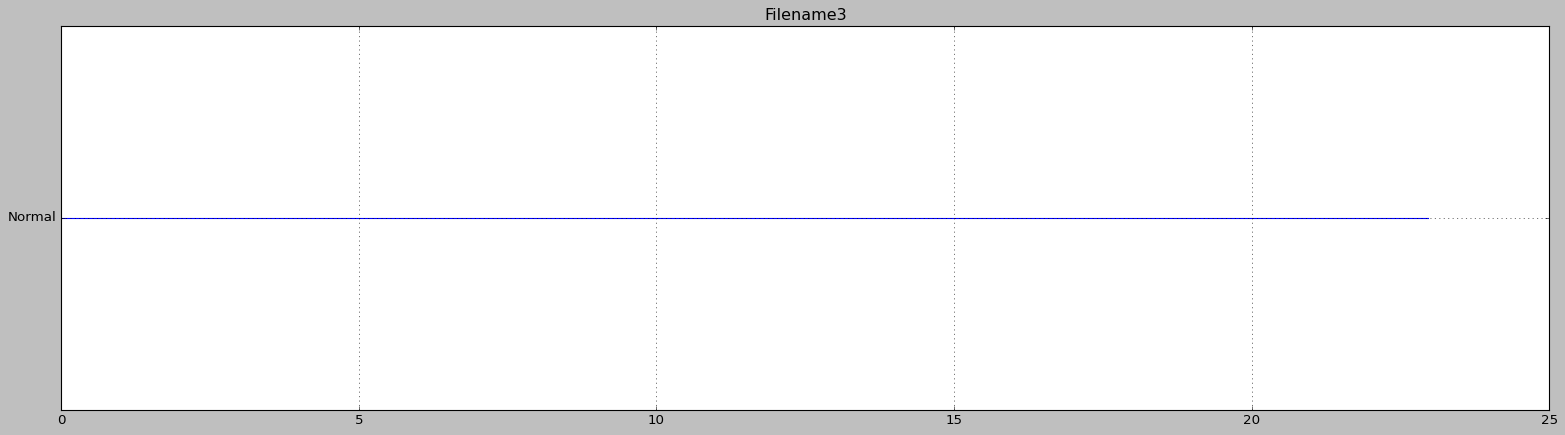

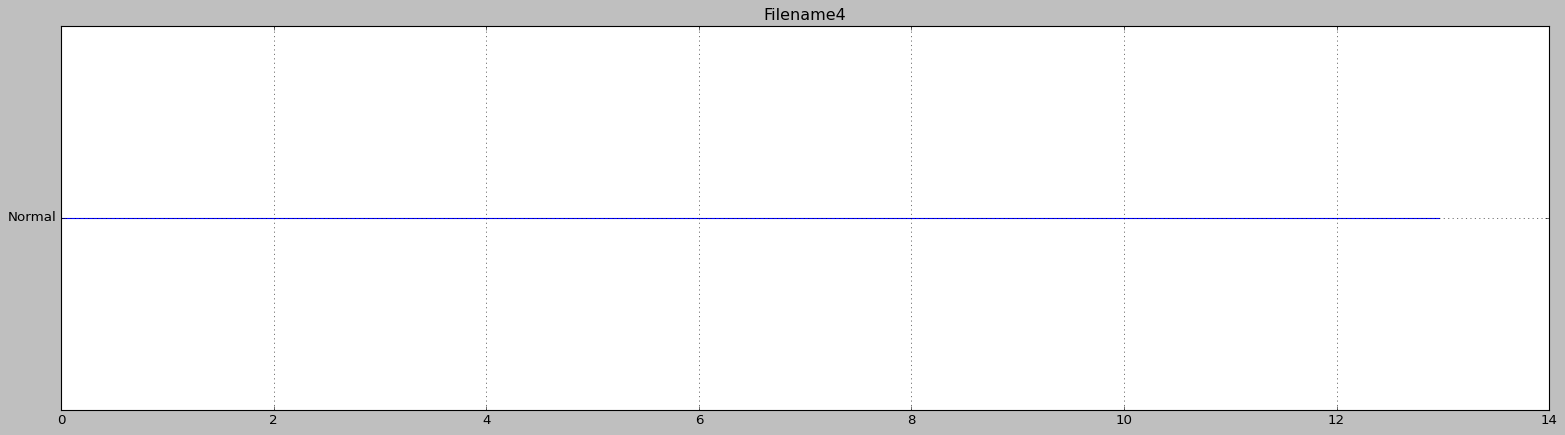

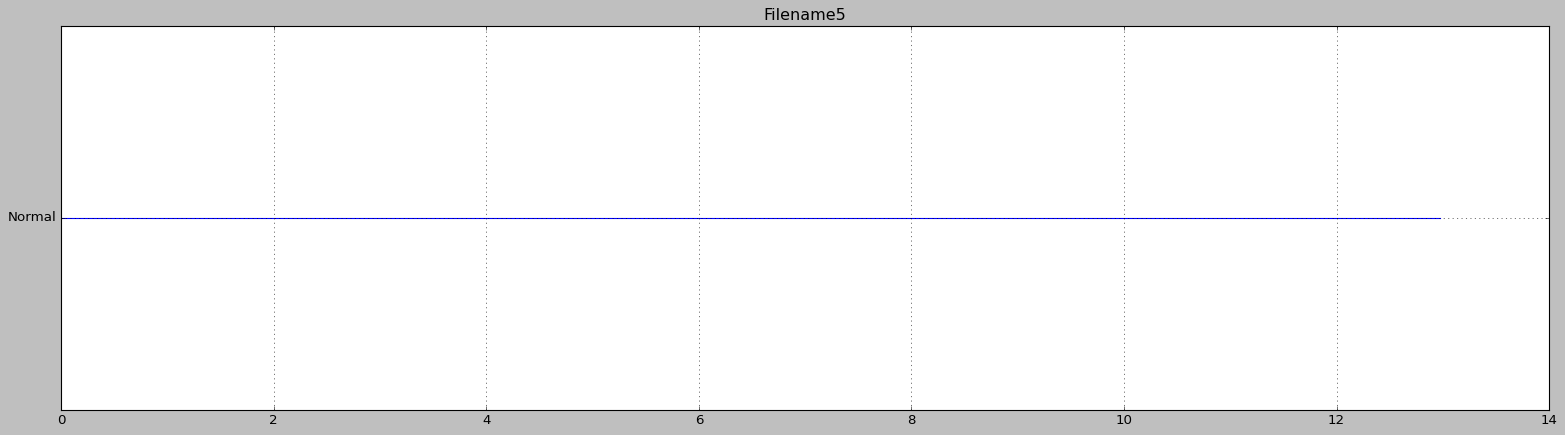

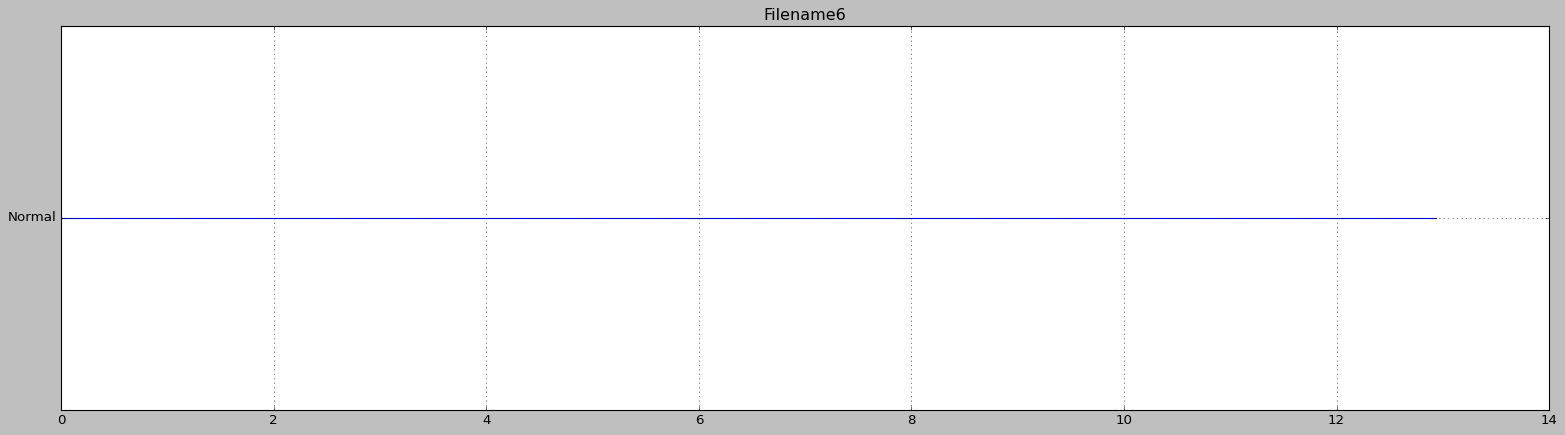

In [39]:
for i in range(len(data)):
    plt.figure(figsize=(24, 6))
    plt.title(f'Filename{i}')
    plt.plot(data[i]['normalized_time'], data[i]['state'])
    plt.grid()